# Perceptron (p)

## Imports

In [2]:
from IPython.display import Image

# Théorie
Le perceptron est l'unité de base des réseaux de neurones. Il s'agit d'un modèle de classification binaire, capable de séparer linéairement 2 classes de points.

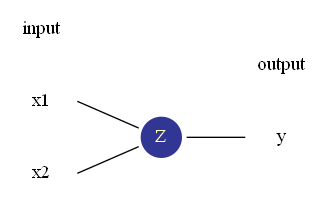

In [2]:
Image(filename='Perceptron.png')

Les classes sont linéairement séparables. La frontière de décision est la droite qui nous permet de séparer les classes. Pour la Frontière de décision $Z(x_1, x_2) = 0$

## Modèle Linéaire

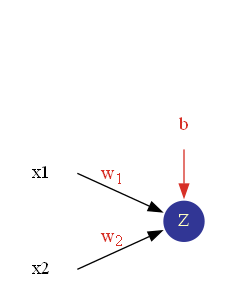

In [5]:
Image(filename='Linear_model.png')

On fournit les variables x1 et x2 à un neurone, en les multipliant chacun par un poids (w1, w2). Un fournit au neurone un coeficient complémentaire (le biais). On obtiens donc : $Z(x_1, x_2) = w_1x_1 + w_2x_2 + b$

## Fonction Sigmoïde (Logistique)
$$a(Z) = \frac{1}{1 + e^{-Z}}$$

## Loi de Bernoulli
$$\mathrm{P}(Y = y) = a(Z)^y\times(1 - a(Z))^{1-y}$$
Explication:  
$\mathrm{P}(Y = 0) = a(Z)^0\times(1 - a(Z))^{1-0}$  
$\mathrm{P}(Y = 1) = a(Z)^1\times(1 - a(Z))^{1-1}$

Probabilité que la classe appartienne à la classe 1:  
$\mathrm{P}(Y=1)=a(Z)$

Probabilité que la classe appartienne à la classe 0:  
$\mathrm{P}(Y=0)=1-a(Z)$

## Résumé...

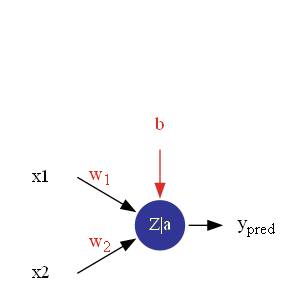

In [6]:
Image(filename='Linear_model_resume.png')

## Fonction coût
En machine Learning, une Fonction Coût (Loss Function) c'est une fonction qui permet de quantifier les erreurs effectuées par un modèle.

## Log Loss
$$L = -\frac{1}{m}\sum^{m}_{i=1}y_i\log(a_i)+(1-y_i)\log(1-a_i)$$
$m$: nombre de données  
$y_i$: donnée n°$i$  
$a_i$: sortie n°$i$

## La vraisemblance
Indique la plausibilité du modèle vis-à-vis de vraies donées.  

<u>_Analogie:_</u>  
_Une histoire est vraisemblable lorsque'elle est en accord avec des faits qui se sont vraiment déroulés._

Likelihood:
$$ L = \prod^{m}_{i=1}P(Y=y_i)$$
Avec la loi de Bernoulli:
$$ L = \prod^{m}_{i=1}a^{y_i}_i\times(1-a_i)^{1-y_i}$$

On effectue un produit de probabilité (entre 0 et 1) donc plus il y a de nombres, plus le résultat tend vers 0.

<u>_Rappel:_</u>  
logarithme d'un produit = la somme des logarithmes : $\log(ab) = \log(a) + \log(b)$

Vraisemblance avec log:

$$ \log(L) = \log(\prod^{m}_{i=1}a^{y_i}_i\times(1-a_i)^{1-y_i})$$

<u>_Remarque:_</u>  
La fonction logarithme est une fonction monotone croissante est concerve l'ordre des termes

$Argmax(Likelihood) = Argmax(LogLikelihood)$

### Dévelopement
<u>_Rappel:_</u>  
$\log(ab) = \log(a) + \log(b)$

<u>_Rappel:_</u>  
$\log(a^y) = y\log(a)$

$$\begin{align}
LL & = \log(\prod^{m}_{i=1}a^{y_i}_i\times(1-a_i)^{1-y_i}) \\
& = \sum^{m}_{i=1}\log(a^{y_i}_i\times(1-a_i)^{1-y_i}) \\
& = \sum^{m}_{i=1}\log(a^{y_i}_i)+\log((1-a_i)^{1-y_i}) \\
& = \sum^{m}_{i=1}y_i\log(a_i)+(1-y_i)\log(1-a_i)
\end{align}$$

<u>_Rappel:_</u>  
On cherche à maximiser la vraisemblance pour obtenir le meilleur modèle possible.  
Cependant en mathématique, les algorithmes de maximisation n'existe pas vraiment.  
On utilise de algorithmes de minimisation.  
$$Maximiser f(x) = Minimiser - f(x)$$
Donc :
$$ \mathcal{L} = -\frac{1}{m}\sum^{m}_{i=1}y_i\log(a_i)+(1-y_i)\log(1-a_i)$$

<u>_Résumé:_</u>  
$Log Loss$ : On chercher à Maximiser la vraisemblance $L$ en minimisant la fonction $ - \log(L)$

## Descente de gradient
Consiste à ajuster les paramètres W et b de façon à minimiser les erreurs du modèle, c'est-à-dire à minimiser la Fonction Coût (Log Loss).  
Pour ça, il faut déterminer comment est-ce-que cette fonction varie en fonction des différents paramètres.  
C'est pourquoi on calcule le Gradient (ou la dérivée) de la fonction Coût. $\frac{\partial\mathcal{L}}{\partial W}$

<u>_Rappel:_</u>  
En Mathématique, la dérivée d'une fonction indique comment cette fonction varie.  
Si la dérivée est négative $\frac{\partial\mathcal{L}}{\partial W} < 0$ cela nous indique que la fonction diminue quand $W$ augmente, il va donc falloir augmenté $W$ pour réduire nos erreurs.  
Si la dérivée est positive $\frac{\partial\mathcal{L}}{\partial W} > 0$ cela nous indique que la fonction augmente quand $W$ augmente, il va donc falloir diminué $W$ pour réduire nos erreurs.  

$$W_{t+1}=W_t-\alpha\frac{\partial\mathcal{L}}{\partial W_t}$$
Avec :  
$W_{t+1}$ : Paramètre $W$ à l'instant $t+1$  
$W_t$ : Paramètre $W$ à l'instant t  
$\alpha$ : Pas d'apprentissage positif  
$\frac{\partial\mathcal{L}}{\partial W_t}$ : Gradient à l'instant $t$  


<u>_Remarque:_</u>  
Pour que ça marche la fonction doit être convexe :  
Qui ne contient qu'un seul minimum.

## Gradients de la fonction Log Loss
<u>_Données:_</u>  
$$\begin{align}
Z & = w_1x_1 + w_2x_2 + b \\
\\
a & = \frac{1}{1 + e^{-Z}} \\
\\
\mathcal{L} & = -\frac{1}{m}\sum^{m}_{i=1}y_i\log(a_i)+(1-y_i)\log(1-a_i) 
\\
W & = W-\alpha\frac{\partial\mathcal{L}}{\partial W} \\
\\
b & = b-\alpha\frac{\partial\mathcal{L}}{\partial b} \\
\end{align}$$

#### Gradients
<u>_Rappel 1:_</u>  
$\log'(x) = \frac{1}{x}$  

<u>_Rappel 2:_</u>  
$a=g\circ f = g(f(z))$  
$\begin{cases}
    g & = \frac{1}{f}  & dérivé : & \frac{-1}{x^2}\\
    f & = 1 + e^{-z} & dérivé : & -e^{-z}
\end{cases}$

<u>_Rappel 3:_</u>  
$(a=g\circ f)' = g'(f(z)) \times f'(z)$

<u>_Premier Gradient:_</u>
$$\frac{\partial\mathcal{L}}{\partial W_1} = \frac{\partial\mathcal{L}}{\partial a} \times \frac{\partial a}{\partial Z} \times \frac{\partial Z}{\partial W_1}$$

<u>_Premièrement:_</u>  
$$\begin{align}
\frac{\partial\mathcal{L}}{\partial a} & = -\frac{1}{m}\sum^{m}_{i=1}\frac{y_i}{a_i}-\frac{1-y_i}{1-a_i} \\
\end{align}$$

<u>_Deuxièmement:_</u>  
$$\begin{align}
\frac{\partial a}{\partial Z} & =  g'(f(z)) \times f'(z) \\
& = \frac{-1}{(1+e^{-z})^2} \times -e^{-z} \\
& = \frac{e^{-z}}{(1+e^{-z})^2} \\ 
& = \frac{1}{1+e^{-z}} \times \frac{e^{-z}}{1+e^{-z}}  \\
& = a(z) \times (\frac{e^{-z} + 1}{1+e^{-z}} - \frac{1}{1+e^{-z}}) \\
& = a(z) \times (1 - a(z)) \\
\frac{\partial a}{\partial Z} & = a \times (1 - a)
\end{align}$$

<u>_Troisièmement:_</u>  
<u>_Remarque:_</u>  
Dans $Z = w_1x_1 + w_2x_2 + b$, on considère $w_2x_2$ et $b$ comme des constantes car ils ne varient pas lorsque l'on fait varier $w_1$.
$$\begin{align}
\frac{\partial Z}{\partial W_1} & = x_1 \\
\end{align}$$


<u>_Calcule du gradient:_</u> 
$$\begin{align}
\frac{\partial\mathcal{L}}{\partial W_1} & =
(-\frac{1}{m}\sum\frac{y}{a}-\frac{1-y}{1-a})
\times
(a(1 - a))
\times
x_1 \\
& = -\frac{1}{m}\sum \frac{ya(1-a)}{a}-\frac{(1-y)a(1-a)}{1-a}\times x_1  \\
& = -\frac{1}{m}\sum (y(1-a)-(1-y)a) x_1  \\
& = -\frac{1}{m}\sum y-ya-a+ya \times x_1  \\
\frac{\partial\mathcal{L}}{\partial W_1} & = -\frac{1}{m}\sum^{m}_{i=1}(y_i-a_i) \times x_{1i}  \\
\end{align}
$$

#### Gradients
$$\begin{align}
\frac{\partial\mathcal{L}}{\partial W_1} & = \frac{1}{m}\sum(a-y) x_{1}  \\
\frac{\partial\mathcal{L}}{\partial W_2} & = \frac{1}{m}\sum(a-y) x_{2}  \\
\frac{\partial\mathcal{L}}{\partial b} & = \frac{1}{m}\sum(a-y)
\end{align}
$$

## Vectorisation
En programmation, cela consiste à mettre nos données dans des **vecteurs**, des **matrices** ou des **tableaux à N-dimension** afin d'effectuer des opérations mathématiques sur l'ensemble de ces données.

### Matrices 
_Par convention :_  
$m$: nombre de données  
$n$: nombre de variables  
Dans cette vidéo, nous allons travailler avec 2 variables, donc $n=2$.

### Vectorization de $Z$ :
$$z=w_1x_1+w_2x_2+b$$  
\begin{equation*}
X =
\begin{bmatrix}
x_{1}^{(1)} & x_{2}^{(1)}\\
x_{1}^{(2)} & x_{2}^{(2)}\\
\vdots & \vdots\\
x_{1}^{(m)} & x_{2}^{(m)}
\end{bmatrix}
\end{equation*}

$$
\begin{equation*}
X =
\begin{bmatrix}z^{(1)}\\
z^{(2)}\\
\vdots\\
z^{(m)}
\end{bmatrix}
=
\begin{bmatrix}\color{red}{w1}\color{orange}{x_{1}^{(1)}} + \color{red}{w2}\color{orange}{x_{2}^{(1)}} + \color{blue}{b}\\
\color{red}{w1}\color{orange}{x_{1}^{(2)}} + \color{red}{w2}\color{orange}{x_{2}^{(2)}} + \color{blue}{b}\\
\vdots\\
\color{red}{w1}\color{orange}{x_{1}^{(m)}} + \color{red}{w2}\color{orange}{x_{2}^{(m)}} + \color{blue}{b}
\end{bmatrix}
=
\underbrace{
    \color{orange}{
        \underbrace{
            \stackrel{\mbox{$X$}}{%
                \begin{bmatrix}x_{1}^{(1)} & x_{2}^{(1)}\\
                x_{1}^{(2)} & x_{2}^{(2)}\\
                \vdots & \vdots\\
                x_{1}^{(m)} & x_{2}^{(m)}
                \end{bmatrix}%
            }
        }_{(m, 2)}
    }\
    \times
    \color{red}{
        \underbrace{
            \stackrel{\mbox{$W$}}{%
                \begin{bmatrix}w_{1}\\
                w_{2}\\
                \end{bmatrix}%
            }
        }_{(2, 1)}
    }
}_{(m, 1)}\
+
\color{blue}{
    \underbrace{
        \stackrel{\mbox{$b$}}{%
            \begin{bmatrix}b\\
            b\\
            \vdots\\
            b
            \end{bmatrix}%
        }
    }_{(m, 1)}\
}
\end{equation*}
$$

$$z=w_1x_1+w_2x_2+b$$  
  
$$\text{Vectorization : } Z=X \cdot W+b$$  
\begin{equation*}
X =
\begin{bmatrix}x_{1}^{(1)} & \dots & x_{n}^{(1)}\\
\vdots & \ddots & \vdots\\
x_{1}^{(m)} & \dots & x_{n}^{(m)}
\end{bmatrix}
\in \mathbb{R}^{m \times n}
\space \space \space \space
W=
\begin{bmatrix}w_{1}\\
\vdots\\
w_{n}
\end{bmatrix}
\in \mathbb{R}^{n \times 1}
\space \space \space \space
b=
\begin{bmatrix}b\\
\vdots\\
b
\end{bmatrix}
\in \mathbb{R}^{m \times 1}
=b \in \mathbb{R}
\end{equation*}

## Vectorization de $A$ :
_Rappel:_  
$a^{(i)} = \sigma(z^{(i)}) = \frac{1}{1 + e^{-z^{(i)}}}$

$$
\begin{equation*}
A =
\begin{bmatrix}a^{(1)}\\
a^{(2)}\\
\vdots\\
a^{(m)}\\
\end{bmatrix}
=
\begin{bmatrix}\sigma(z^{(1)})\\
\sigma(z^{(2)})\\
\vdots\\
\sigma(z^{(m)})\\
\end{bmatrix}
=\color{orange}{\sigma
    \left(
        \color{black}{
            \begin{bmatrix}z^{(1)}\\
            z^{(2)}\\
            \vdots\\
            z^{(m)}\\
            \end{bmatrix}
        }
    \right)
}
= \sigma(Z)
\end{equation*}
$$


## Vectorisation de la Fonction Coût
Calculer l'erreur globale en fesant **<span style="color: orange;">la somme</span>** des erreurs entre chaque point $\color{red}{a^{(i)}}$ et $\color{green}{y^{(i)}}$  
Notre objectif: Comparer directement le vecteur $\color{red}A$ au vecteur $\color{green}y$

$$ \mathcal{L} = -\frac{1}{m}\color{orange}{\sum^{m}_{i=1}}\color{green}{y^{(i)}}\times\log(\color{red}{a^{(i)}})+(1-\color{green}{y^{(i)}})\times\log(1-\color{red}{a^{(i)}})$$

$$ \mathcal{L} =
-\frac{1}{m}
\color{orange}{
    \sum^{m}_{i=1}
}
\color{green}{
    \stackrel{\mbox{$y$}}{%
        \begin{bmatrix}y^{(1)}\\
        y^{(2)}\\
        \vdots\\
        y^{(m)}\\
        \end{bmatrix}%
     }
}
\times
\log
    \stackrel{\color{red}{\mbox{$A$}}}{%
        \left(
            \color{red}{
                \begin{bmatrix}a^{(1)}\\
                a^{(2)}\\
                \vdots\\
                a^{(m)}\\
                \end{bmatrix}%
            }
        \right)
     }
+
\stackrel{\,\,\,\,\,\,\,\,\,\color{green}{\mbox{$y$}}}{%
    \left(
        1-
        \color{green}{
            \begin{bmatrix}y^{(1)}\\
            y^{(2)}\\
            \vdots\\
            y^{(m)}\\
            \end{bmatrix}%
        }
    \right)
}
\times
\log
\stackrel{\,\,\,\,\,\,\,\,\,\color{red}{\mbox{$A$}}}{%
    \left(
        1-
        \color{red}{
            \begin{bmatrix}a^{(1)}\\
            a^{(2)}\\
            \vdots\\
            a^{(m)}\\
            \end{bmatrix}%
        }
    \right)
}
$$

$$ \mathcal{L} =
-\frac{1}{m}
\color{orange}{
    \sum^{m}_{i=1}
}
\begin{bmatrix}\color{green}{y^{(1)}} & \times \log( & \color{red}{a^{(1)}} &)\\
\color{green}{y^{(2)}} & \times \log( & \color{red}{a^{(2)}} &)\\
\color{green}{\vdots} & \vdots & \color{red}{\vdots} &\\
\color{green}{y^{(m)}} & \times \log( & \color{red}{a^{(m)}} &)\\
\end{bmatrix}%
+
\begin{bmatrix}(1-\color{green}{y^{(1)}}) \times \log(1-\color{red}{a^{(1)}})\\
(1-\color{green}{y^{(2)}}) \times \log(1-\color{red}{a^{(2)}})\\
\vdots\\
(1-\color{green}{y^{(m)}}) \times \log(1-\color{red}{a^{(m)}})\\
\end{bmatrix}%
$$

$$ \mathcal{L} =
-\frac{1}{m}
\color{orange}{
    \sum^{m}_{i=1}
}
\underbrace{
    \begin{bmatrix}\color{green}{y^{(1)}} \times \log(\color{red}{a^{(1)}}) + (1-\color{green}{y^{(1)}}) \times \log(1-\color{red}{a^{(1)}})\\
    \color{green}{y^{(2)}} \times \log(\color{red}{a^{(2)}}) + (1-\color{green}{y^{(2)}}) \times \log(1-\color{red}{a^{(2)}})\\
    \vdots\\
    \color{green}{y^{(m)}} \times \log(\color{red}{a^{(m)}}) + (1-\color{green}{y^{(m)}}) \times \log(1-\color{red}{a^{(m)}})\\
    \end{bmatrix}%
}_{\color{blue}{(m, 1)}}
$$
_Remarque :_  
**<span style="color: orange;">La somme</span>** de ce vecteur $\color{blue}{(m,1)}$ donne un nombre réel

## Vectorisation de la Descente de Gradient
_Rappel:_  
$W_{1}=W_1-\alpha\frac{\partial\mathcal{L}}{\partial W_1}$  
$W_{2}=W_2-\alpha\frac{\partial\mathcal{L}}{\partial W_2}$  
$b=b-\alpha\frac{\partial\mathcal{L}}{\partial b}$

$$
\begin{equation*}
\color{orange}{
    W=
    \begin{bmatrix}w_{1}\\
    w_{2}\\
    \end{bmatrix}
}
\,\,\,\,\,\,\,\,\,
\color{green}{
    \mathop{
        \frac{\partial\mathcal{L}}{\partial W} =
        \begin{bmatrix}\frac{\partial\mathcal{L}}{\partial W_1}\\
        \frac{\partial\mathcal{L}}{\partial W_2}
        \end{bmatrix}
    }\limits_{\text{Jacobien(excluant $b$)}}
}
\end{equation*}
$$

_Donc:_
$$
   \color{orange}W = \color{orange}W - \alpha\color{green}{\frac{\partial\mathcal{L}}{\partial W}}
$$
_Note:_  
D'un point de vue mathématique, la notation la plus correcte est $W_{t+1}=W_t-\alpha\frac{\partial\mathcal{L}}{\partial W_t}$  
La notation utiliséee ici est celle que nous emploierons pour la partie programmation

_Rappel:_  
$b$ est un nombre réel (pas un vecteur).  
Donc la dérivée partielle $\frac{\partial\mathcal{L}}{\partial b}$ est aussi un nombre réel.  
Pas besoin de vectoriser cette équation.

## Vectorisation des Gradients
$$
\begin{equation*}
    \frac{\partial\mathcal{L}}{\partial W}=
    \underbrace{
        \begin{bmatrix}\frac{\partial\mathcal{L}}{\partial W_1}\\
        \frac{\partial\mathcal{L}}{\partial W_2}\\
        \end{bmatrix}
    }_{(2, 1)}
    =
    \begin{bmatrix}\frac{1}{m}\sum^{m}_{i=1}(a^{(i)}-y^{(i)}) \times x_{1}^{(i)}\\
    \frac{1}{m}\sum^{m}_{i=1}(a^{(i)}-y^{(i)}) \times x_{2}^{(i)}\\
    \end{bmatrix}
    =\frac{1}{m}
    \begin{bmatrix}\sum^{m}_{i=1}(a^{(i)}-y^{(i)}) \times x_{1}^{(i)}\\
    \sum^{m}_{i=1}(a^{(i)}-y^{(i)}) \times x_{2}^{(i)}\\
    \end{bmatrix}
    =\frac{1}{m}
    \begin{bmatrix}(\color{red}{a^{(1)}}-\color{blue}{y^{(1)}})\color{orange}{x_{1}^{(1)}}  +  \dots  +  (\color{red}{a^{(m)}}-\color{blue}{y^{(m)}})\color{orange}{x_{1}^{(m)}}\\
    (\color{red}{a^{(1)}}-\color{blue}{y^{(1)}})\color{orange}{x_{2}^{(1)}}  + \dots +  (\color{red}{a^{(m)}}-\color{blue}{y^{(m)}})\color{orange}{x_{2}^{(m)}}\\
    \end{bmatrix}
\end{equation*}
$$

$$
\begin{equation*}
    \frac{\partial\mathcal{L}}{\partial W}=
    \frac{1}{m}
    \underbrace{
        \color{orange}{
            \underbrace{
                \mathop{
                    \begin{bmatrix}x_1^{(1)} x_1^{(2)} \dots x_1^{(m)}\\
                    x_2^{(1)} x_2^{(2)} \dots x_2^{(m)}
                    \end{bmatrix}
                }\limits_{\mbox{$X^T$}}
            }_{(2, m)}
        }
        \times
        \color{purple}{
            \underbrace{
                \color{black}{
                    \left(
                        \color{red}{
                            \mathop{
                                \begin{bmatrix}a^{(1)}\\
                                a^{(2)}\\
                                \vdots\\
                                a^{(m)}
                                \end{bmatrix}
                            }\limits_{\mbox{$A$}}
                        }
                        -
                        \color{blue}{
                            \mathop{
                                \begin{bmatrix}y^{(1)}\\
                                y^{(2)}\\
                                \vdots\\
                                y^{(m)}
                                \end{bmatrix}
                            }\limits_{\mbox{$y$}}
                        }
                    \right)
                }
            }_{(m,1)}
        }
    }_{(2,1)}
\end{equation*}
$$

_Donc:_
$$
\begin{equation*}
    \frac{\partial\mathcal{L}}{\partial W}=
    \frac{1}{m}\color{orange}{X^T}\cdot(\color{red}A-\color{blue}y)
\end{equation*}
$$

Le paramètre $b$ étant un nombre réel (et non un vecteur) sa dérivée est elle aussi un nombre réel.
$$
\begin{equation*}
    \frac{\partial\mathcal{L}}{\partial b}=
    \frac{1}{m}\sum^{m}_{i=1}(\color{red}{a^{(i)}}-\color{blue}{y^{(i)}})
    =
    \frac{1}{m}\sum^{m}_{i=1}
    \left(
        \color{red}{
            \mathop{
                \begin{bmatrix}a^{(1)}\\
                a^{(2)}\\
                \vdots\\
                a^{(m)}
                \end{bmatrix}
            }\limits_{\mbox{$A$}}
        }
        -
        \color{blue}{
            \mathop{
                \begin{bmatrix}y^{(1)}\\
                y^{(2)}\\
                \vdots\\
                y^{(m)}
                \end{bmatrix}
            }\limits_{\mbox{$y$}}
        }
    \right)
    =\frac{1}{m}\sum^{m}_{i=1}
    \left(
        \begin{bmatrix}\color{red}{a^{(1)}}-\color{blue}{y^{(1)}}\\
        \color{red}{a^{(2)}}-\color{blue}{y^{(2)}}\\
        \vdots\\
        \color{red}{a^{(m)}}-\color{blue}{y^{(m)}}
        \end{bmatrix}
    \right)
    =\frac{1}{m}\sum^{m}_{i=1}
    \color{red}{a^{(1)}}-\color{blue}{y^{(1)}}+\color{red}{a^{(2)}}-\color{blue}{y^{(2)}}+\dots+\color{red}{a^{(m)}}-\color{blue}{y^{(m)}}
\end{equation*}
$$

$$
\begin{equation*}
    \frac{\partial\mathcal{L}}{\partial b}
    =
    \frac{1}{m}\sum(A-y)
\end{equation*}
$$

# Pratique

## Imports

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
import plotly.graph_objects as go

## 1. Dataset

dimensions de X: (100, 2)
dimensions de y: (100, 1)


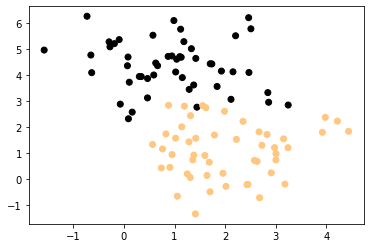

In [51]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='copper')
plt.show()

# 2. Fonctions du modele

In [52]:
"""
Initialisation de la matrice
W: qui à la meme nombre de paramètres que de variables dans X et
b: un nombre reel aleatoire
"""
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [53]:
"""
Fonction qui calule les vecteurs Z et A
à l'aide de X, W et b
"""
def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

In [54]:
"""
Prends en paramètre le vecteur d'activation sigmoïd A
et le vecteur de classes y
"""
def log_loss(A, y):
    return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

In [55]:
"""
Calcul les differents gradients
dW le jacobien
db
"""
def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return (dW, db)

In [56]:
"""
Fonction qui implemente la descente de gradient sur
W et b
"""
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

In [66]:
def predict(X, W, b, debug=False):
    A = model(X, W, b)
    if debug:
        print(A)
    return A >= 0.5 # return y=1 for toxic y=0 else

In [67]:
def artificial_neurone(X, y, learning_rate = 0.1, n_iter = 100):
    # initialisation
    W, b = initialisation(X)
    
    Loss = []
    
    for i in range(n_iter):
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)
        
    y_pred = predict(X, W, b)
    print(accuracy_score(y, y_pred))
    
    plt.plot(Loss)
    plt.show()
    
    return (W, b)

0.92


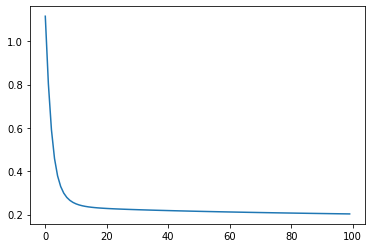

(2, 1)

In [68]:
W, b = artificial_neurone(X, y)
W.shape

# 3. Frontiere de décision

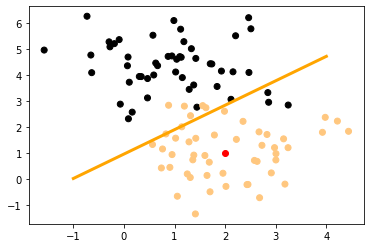

[0.90802216]


array([ True])

In [72]:
# nouvelle plant à determiner
new_plant = np.array([2, 1])

# frontier de décision : w0x0 +w1x1 +b =0
# x1 = (-w0x0-b)/w1 pour x0[-1,4]
x0 = np.linspace(-1, 4, 100)
x1 = (-W[0] * x0 - b) / W[1]

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='copper')
plt.scatter(new_plant[0], new_plant[1], c='red')
plt.plot(x0, x1, c='orange', lw=3)
plt.show()

predict(new_plant, W, b, True)

# 4. Visualisations 3D

In [80]:
fig = go.Figure(data=[go.Scatter3d( 
    x=X[:, 0].flatten(),
    y=X[:, 1].flatten(),
    z=y.flatten(),
    mode='markers',
    marker=dict(
        size=5,
        color=y.flatten(),                
        colorscale='Turbo',  
        opacity=0.8,
        reversescale=True
    )
)])

fig.update_layout(template= "plotly", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()

In [83]:
X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
xx0, xx1 = np.meshgrid(X0, X1)
Z = W[0] * xx0 + W[1] * xx1 + b
A = 1 / (1 + np.exp(-Z))

fig = (go.Figure(data=[go.Surface(z=A, x=xx0, y=xx1, colorscale='turbo', opacity = 0.7, reversescale=True)]))

fig.add_scatter3d(x=X[:, 0].flatten(), y=X[:, 1].flatten(), z=y.flatten(), mode='markers', marker=dict(size=5, color=y.flatten(), colorscale='turbo', opacity = 0.9, reversescale=True))


fig.update_layout(template= "plotly", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()

## Cat vs Dog
### Import

In [84]:
from utilities import *

In [85]:
X_train, y_train, X_test, y_test = load_data()

### Checking datasets

In [87]:
print(X_train.shape)
print(y_train.shape)
print(np.unique(y_train, return_counts=True)) # le dataset est équilibré 500 classes 0 et 500 classes 1

(1000, 64, 64)
(1000, 1)
(array([0., 1.]), array([500, 500], dtype=int64))


In [89]:
print(X_test.shape)
print(y_test.shape)
print(np.unique(y_test, return_counts=True)) # le dataset est équilibré 100 classes 0 et 100 classes 1

(200, 64, 64)
(200, 1)
(array([0., 1.]), array([100, 100], dtype=int64))


C:\Users\thiba\.virtualenvs\neural_networks-nOvusaqa\lib\site-packages\matplotlib\text.py:1223: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



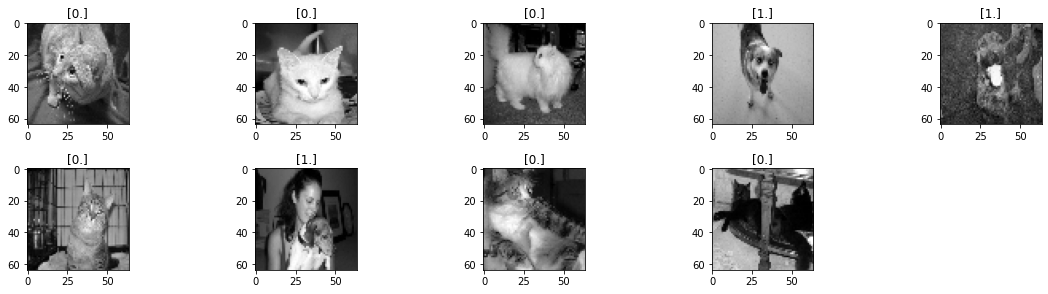

In [90]:
plt.figure(figsize=(16, 8))
for i in range(1, 10):
    plt.subplot(4, 5, i)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.tight_layout()
plt.show()

In [ ]:
# TO DO 
# 1. Normaliser le train_set et le test_set (0-255 -> 0-1)
# 2. flatten() les variables du train_set et du test_set (64x64 -> 4096)
# 3. Entrainer le modele sur le train_set (tracer la courbe d'apprentissage, trouver les bons hyper-params)
# (si vous rencontrez un probleme avec le log_loss, utiliser la fonction de sklearn a la place !)
# 4. Évaluer le modele sur le test_set (tracer également la courbe de Loss pour le test_set)
# 5. Partager vos conclusions dans les commentaires !